In [1]:
# import library
import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import rcParams
import matplotlib.style as style

import seaborn as sns
from scipy import stats
from scipy.stats import kstest
import math
import scipy.stats as st
import statsmodels.stats.proportion as sp

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_auc_score



In [3]:
df = pd.read_csv('train.csv', delimiter = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**df_train terdiri dari 45211 baris dan 17 kolom. Terdapat 10 categorical features (termasuk label) dan 7 numerical features.**

### Exploratory Data Analysis

In [4]:
# melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df_rounded = df.round()
df_rounded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
#Jumlah Missing Value
df.isna().sum()/len(df)*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [8]:
df.duplicated().sum()

0

Dari informasi di atas bahwa dataset tidak terdapat missing value dan data yang duplikat

In [19]:
# melihat jumlah nasabah yang menerima tawaran dan menolak
df['y'].value_counts(normalize=True)*100

no     88.30152
yes    11.69848
Name: y, dtype: float64

### Descriptive Statistics

In [20]:
#Pemisahan data Yes Dan NO
#df_yes= df[df['y']=='yes']
#df_no= df[df['y']=='no']

- Semua tipe data dan nama kolom sudah sesuai dengan valuenya.
- Tidak terdapat nilai kosong atau missing value.
- Tidak terdapat duplicated row
- Terdapat imbalance data user yang membuka deposito dan tidak membuka deposito

In [21]:
#Pengelompokan Kolom Berdasarkan Typedata (Numerik & Kategori)

df.select_dtypes(exclude='object').columns
df.select_dtypes(include='object').columns
nums = df.select_dtypes(exclude='object').columns
cats = df.select_dtypes(include='object').columns
#nums=['age','balance','day','duration','campaign','pdays','previous']
#cats=['job','marital','education','default','housing','loan','contact','month','poutcome','y']

In [22]:
df[nums].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


- Terdapat nilai mean dan median yang berbeda cukup signifikan diantaranya kolom `balance`, `duration`, dan `pdays` sehingga terdapat dugaan adanya outliers.
- Terdapat nilai min dan median yang cukup aneh untuk kolom `pdays`, dimana `min dan mediannya` bernilai `-1`. Setelah dilakukan pemeriksaan terhadap deskripsi kolom, untuk nasabah yang memiliki `pdays` bernilai `-1` merupakan nasabah yang belum pernah dihubungi oleh call center terkait telemarketing pada campaign sebelumnya.
- Terdapat nilai `min` yang cukup aneh untuk kolom `balance`, yaitu nilai min yang merupakan bilangan negatif. Berdasarkan deskripsi kolom, `balance` merupakan **saldo rata-rata tahunan**, secara logika hal ini cukup aneh apabila seorang nasabah memiliki saldo rata-rata tahunan yang bernilai negatif. Perlu dipastikan lagi apakah ini merupakan kesalahan pada input data, atau terdapat beberapa nasabah yang memanfaatkan fasilitas kredit.

In [23]:
# how many observation that have minus balance
len(df[df['balance']<0])/len(df)

0.08329831235761209

In [24]:
df[nums].mode()

,age,balance,day,duration,campaign,pdays,previous
0,32,0,20,124,1,-1,0


Dari informasi di atas diperoleh bahwa:

1. Usia client yang paling banyak ditemukan adalah client dengan usia 32 tahun
2. Balance yang paling banyak ditemukan adalah 0 euro.
3. Day atau tanggal paling banyak adalah 20
4. Duration yang paling banyak dilakukan adalah 124 detik.
5. Jumlah campaign yang sering(muncul) dilakukan untuk client adalah sebanyak 1 kali.
6. Dari nilai pdays, yang paling banyak adalah -1 (client belum dihubungi sebelumnya).
7. Nilai previous yang menandakan jumlah kontak yang dilakukan sebelum kampanye dilakukan terbanyak adalah 0

In [25]:
df[cats].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


Dari informasi diatas diperoleh bahwa:

1. Terdapat 12 macam pekerjaan namun blue-collar merupakan pekerjaan terbanyak.
2. Client yang terbanyak memiliki status menikah.
3. Kebanyakan pendidikan client adalah secondary.
4. Default no merupakan data yang kebanyakan ditemukan pada client.
5. Kebanyakan dari client sudah mempunyai rumah.
6. Kebanyakan dari client tidak mempunyai pinjaman.
7. client paling banyak dihubungi melalui cellular.
8. Data month yang paling banyak adalah may.
9. Poutcome yang paling banyak ditemukan adalah unknown.
10. Nilai dari y yang paling sering muncul adalah no yang menandakan bahwa client kebanyakan tidak menjadi nasabah deposito

In [26]:
# Melakukan value count untuk setiap kolom kategorikal

#for col in cats:
 #   print(f'''Value count kolom {col}:''')
  #  print(df[col].value_counts(normalize=True)*100)
   # print()

In [27]:
 #Melakukan value count untuk setiap kolom numerik
#for i in nums:
 #   print(f"\nValue count kolom {i}:\n{20*'-'}")
  #  print(df[i].value_counts())

### Univariate Analysis

**Numerical Features**

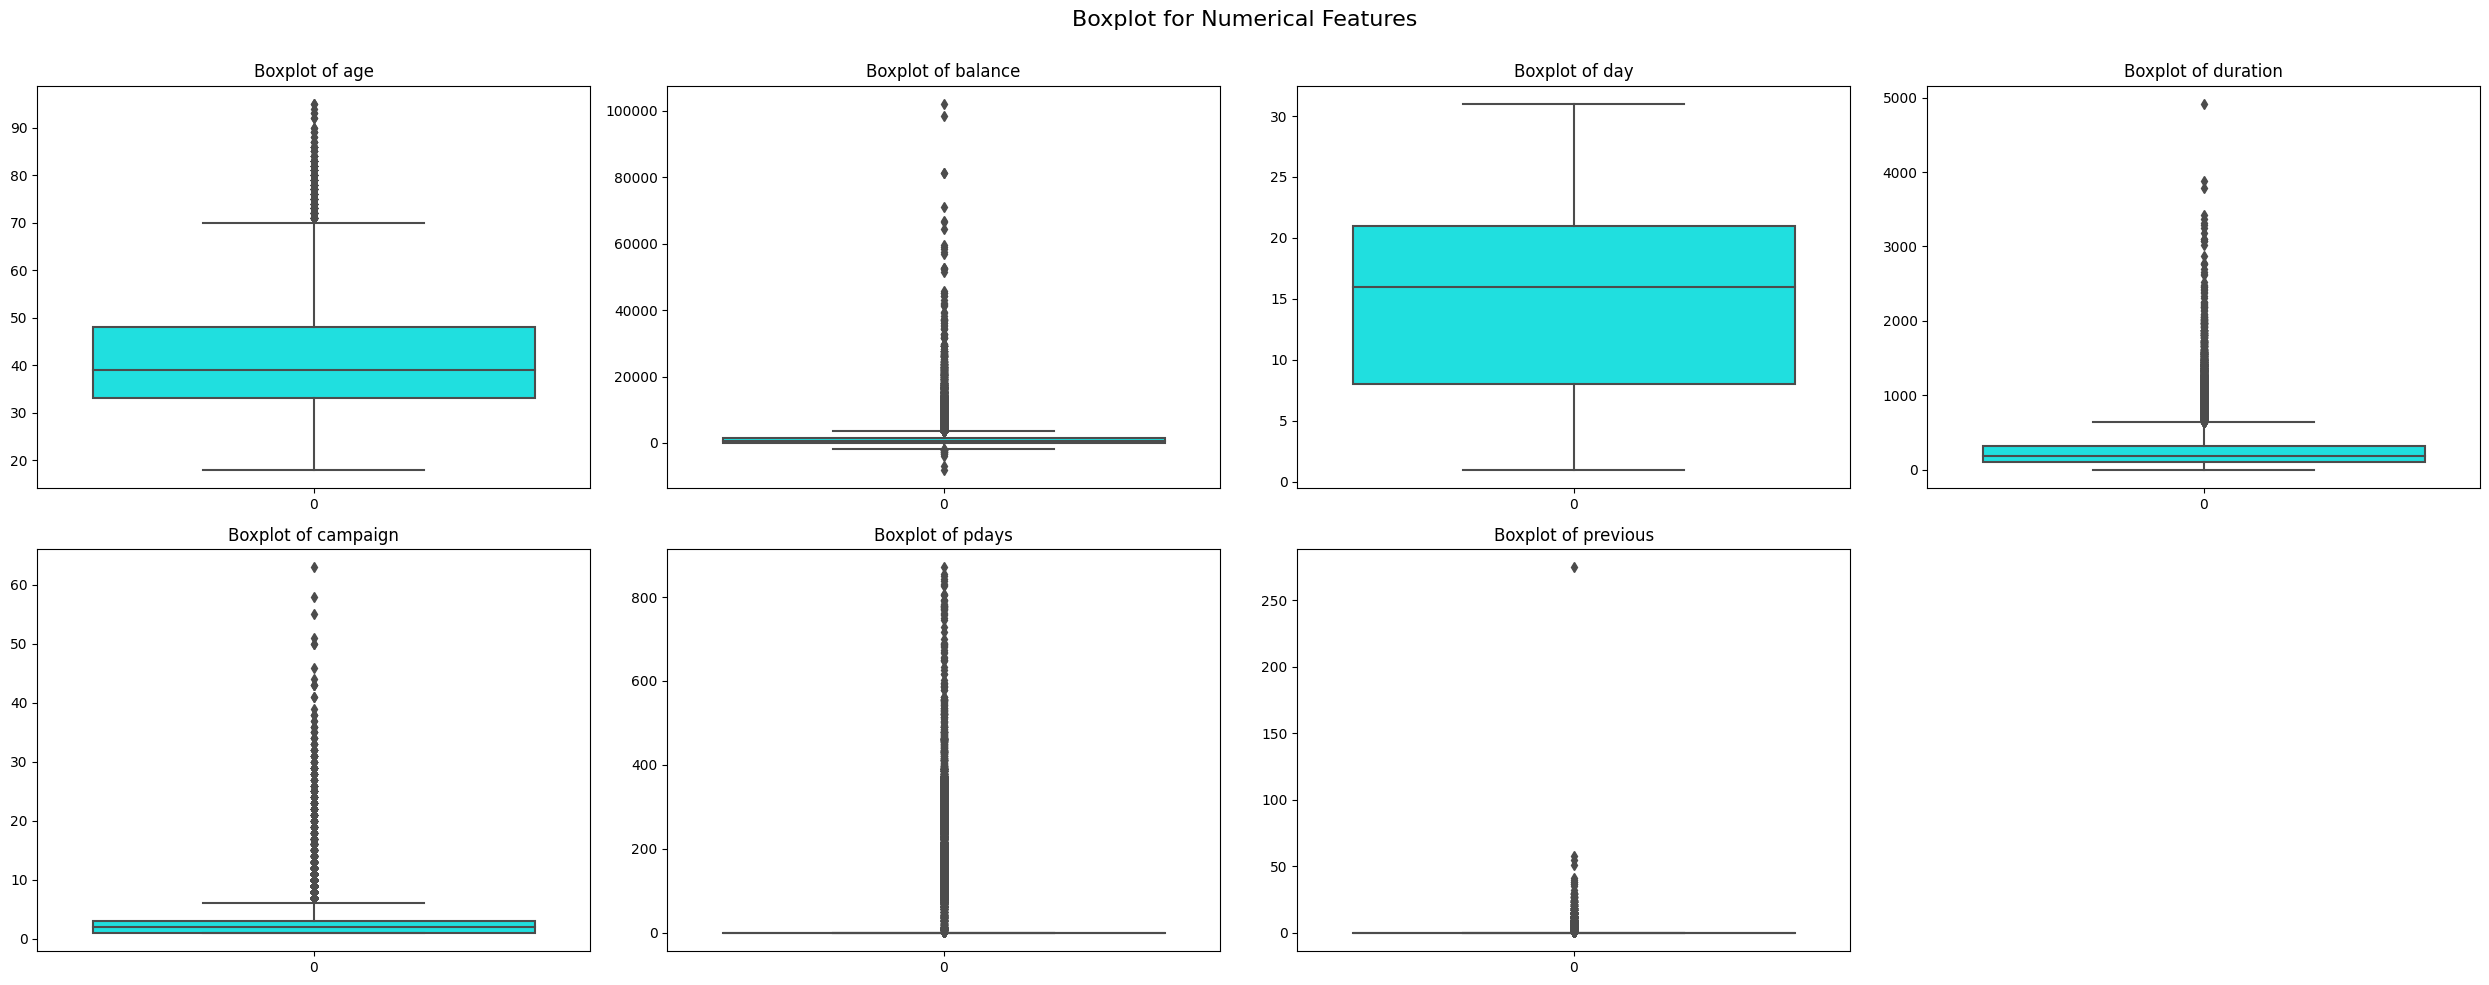

In [28]:
# Membuat boxplot untuk seluruh numerical features
plt.figure(figsize=(25, 10))
for i in range(0, len(nums)):
    plt.subplot(2,4, i+1)
    sns.boxplot(df[nums[i]], color='Aqua')
    plt.title('Boxplot of {}'.format(nums[i]))
    plt.suptitle('Boxplot for Numerical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout()
plt.show()

In [29]:
#plt.figure(figsize=(12, 5))
#for i in range(0, len(nums)):
 #   plt.subplot(3,3, i+1)
  #  sns.distplot(df[nums[i]], color='Aqua')
   # plt.tight_layout()

In [30]:
#skewness value
for i in range(0, len(nums)):
    print(f"Skewness {df[nums].columns[i]} : {df[nums[i]].skew()}")

Skewness age : 0.6848179257252598
Skewness balance : 8.360308326166326
Skewness day : 0.09307901402122411
Skewness duration : 3.144318099423456
Skewness campaign : 4.898650166179674
Skewness pdays : 2.6157154736563477
Skewness previous : 41.84645447266292


In [31]:
#for i in range(0, len(nums)):
 #   plt.subplot(3,3, i+1)
  #  sns.violinplot(y=df[nums[i]], color='Aqua')
   # plt.tight_layout()

Dari hasil visualisasi distribution plot dan boxplot di atas, dapat diketahui bahwa:
- Hampir seluruh kolom numerikal memiliki jenis distribusi `positively skewed` atau `right-skewed`, kecuali untuk distribusi untuk kolom `day` dimana kolom tersebut memiliki jenis distribusi `multimodal`.
- Terlihat bahwa kolom `balance`, `duration`, `campaign`, `pdays` dan `previous` memiliki persebaran data yang cukup luas.
- Terdapat banyak value yang berpotensi sebagai outliers pada seluruh kolom numerikal, kecuali kolom `day` yang terlihat tidak memiliki outliers.
- Terdapat beberapa value yang berpotensi menjadi outliers ekstrim pada kolom `balance`, `duration` dan `previous`.
- Pada kolom `balance`, `duration`, `campaign` didominasi oleh nilai yang kecil. Variasi data yang banyak pada nilai tinggi membuat oulier menjadi semakin banyak.
- Pada kolom `pdays` memiliki nilai -1 (belum dihubungi sebelumnya) yang mendominasi yaitu 36954 dari 45211 baris atau sekitar 81.7% data sehingga kotak menjadi berpusat pada nilai -1 sehingga nilai-nilai diatas -1 menjadi oulier yang cukup banyak sekitar 18.3%.
- Pada kolom previous memiliki nilai 0 yang mendominasi yang sesuai dengan nilai -1 pada kolom pdays karena nilai ini memiliki korelasi yang kuat. Sehingga selain dari nilai 0 akan menjadi outlier. Namun ada satu nilai yang benar-benar sangat jauh yaitu 275 (outlier ini dapat dihapus karena hanya satu saja dan jaraknya sangat jauh).

**Categorical Features**

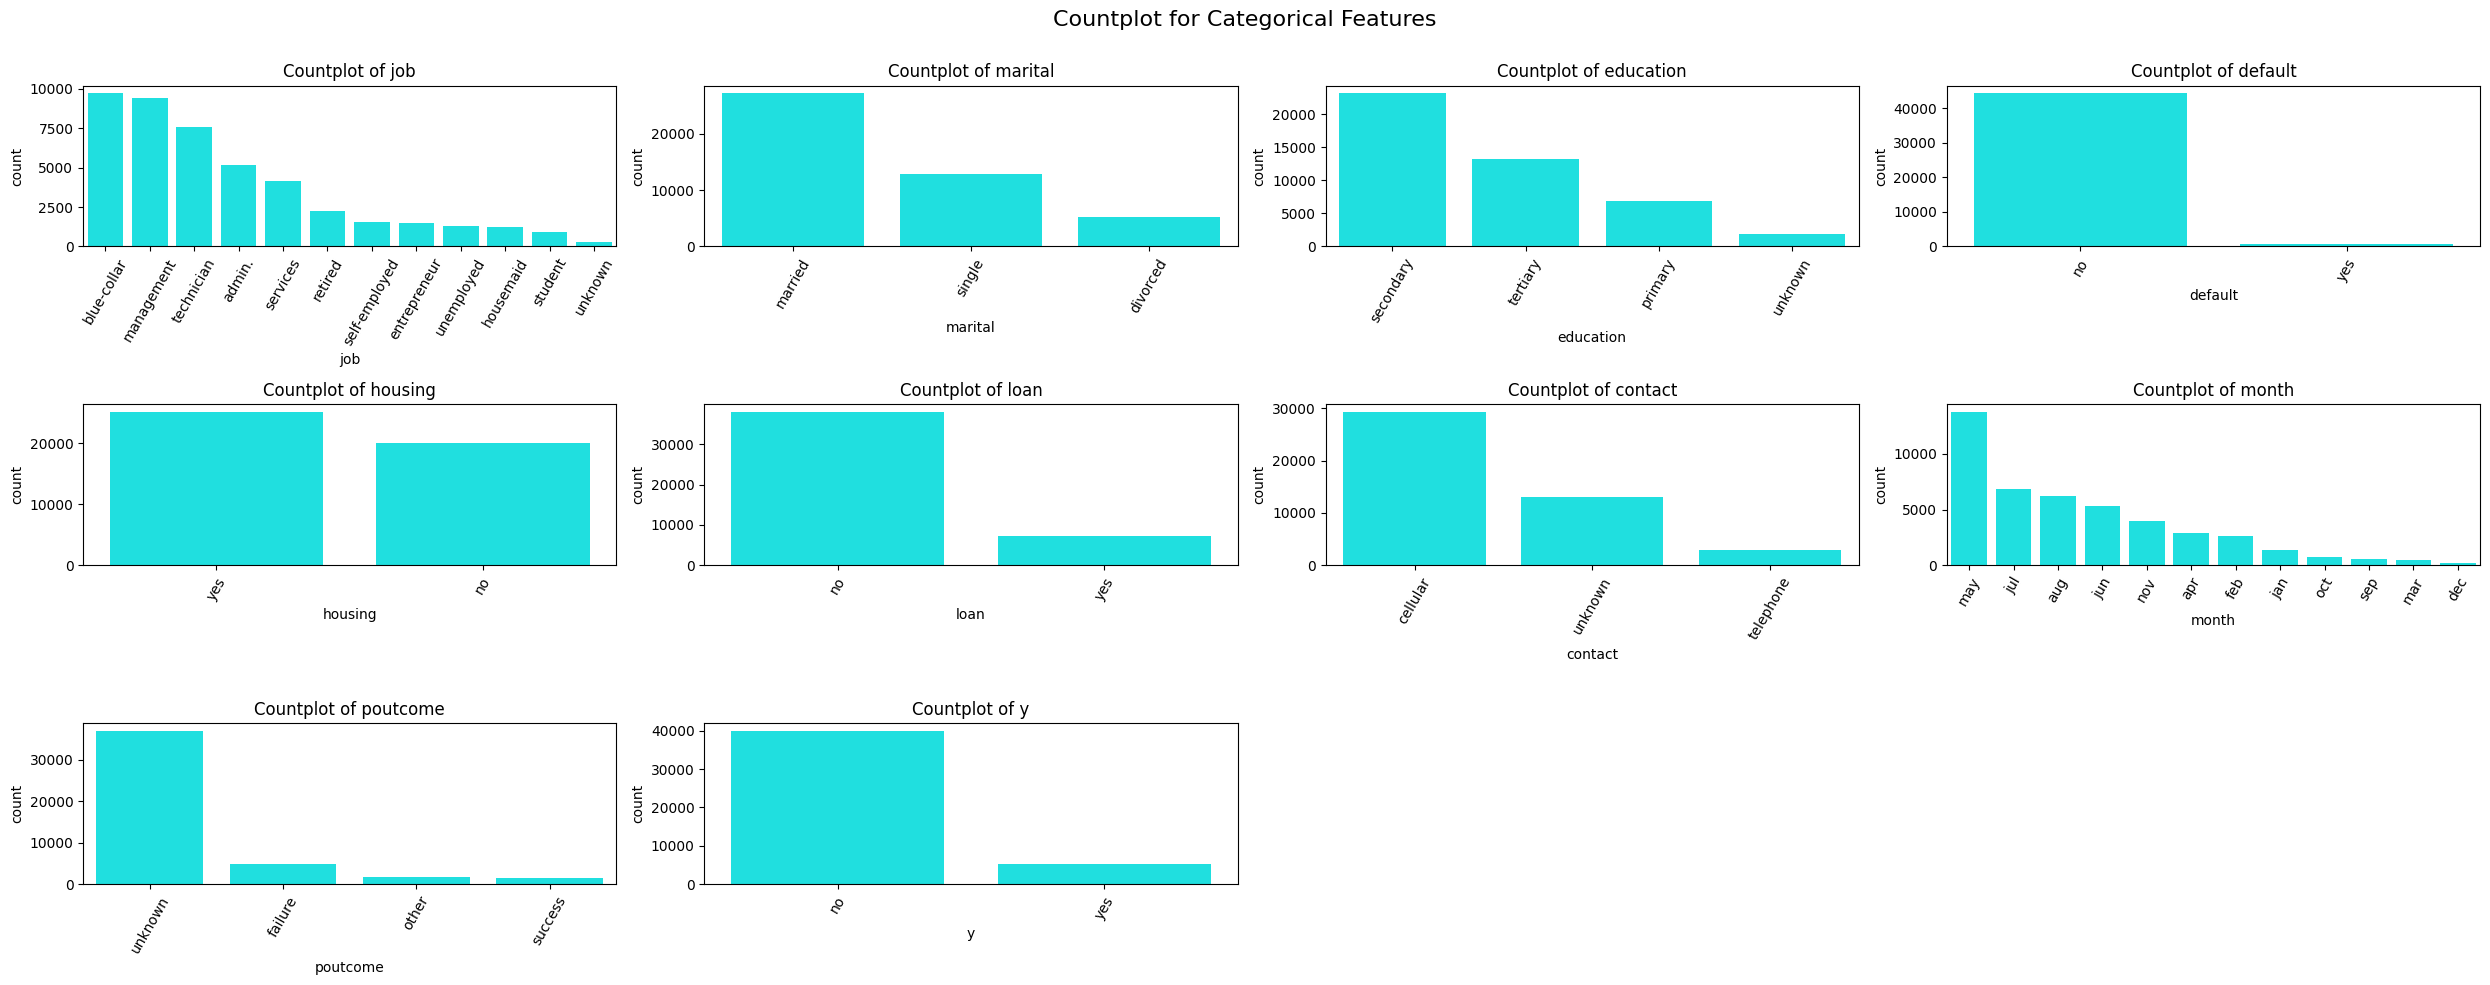

In [32]:
# Membuat catplot untuk setiap kolom kategori
plt.figure(figsize=(25, 10))
for i in range(0, len(cats)):
    plt.subplot(3,4, i+1)
    sns.countplot(x=df[cats[i]], color='Aqua', order = df[cats[i]].value_counts().index)
    plt.title('Countplot of {}'.format(cats[i]))
    plt.suptitle('Countplot for Categorical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout()
    plt.xticks(rotation = 60)

plt.show()

In [33]:
df['contoh'] = pd.qcut(df['age'], q=5)

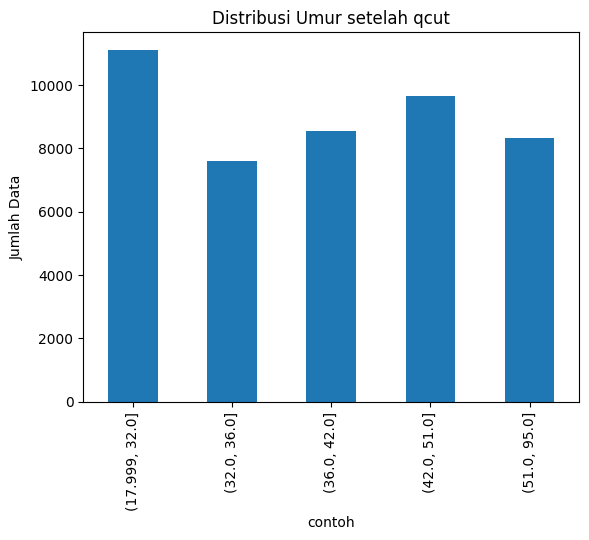

In [34]:
df['contoh'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('contoh')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Umur setelah qcut')
plt.show()

Dari barplot diatas diperoleh bahwa dari keseluruhan data kategorik:
1. Nasabah yang terbanyak berprofesi sebagai `Blue-collar`
2. Nasabah dengan status sudah menikah merupakan klien yang terbanyak
3. pendidikan `secondary` merupakan yang paling banyak
4. default `no` lebih banyak dibandingkan `yes`
5. Nasabah yang memiliki cicilan rumah lebih banyak daripada yang tidak memiliki rumah
6. Nasabah dengan status tidak ada pinjaman lebih banyak dibandingkan yang memiliki pinjaman
7. Nasabah lebih banyak dihubungi melalui `cellular` daripada telephone dan unknown
8. bulan `may` merupakan bulan yang paling banyak dilakukan campaign
9. hasil dari kampanye pemasaran sebelumnya yang paling banyak adalah `unknown`

Selain itu dapat diketahui juga bahwa:
- Terdapat beberapa kategori **unkown** pada kolom `job`, `education`, `contact` dan `poutcome`. Dimana jumlah kategori **unkown** pada kolom `poutcome` cukup mendominasi.
- Kategori `no` pada kolom `default` cukup mendominasi. Dimana sebanyak 98% value adalah `no` yang menandakan bahwa hampir seluruh nasabah yang dihubungi adalah nasabah yang tidak memiliki kredit.

#### Multivariate Analysis

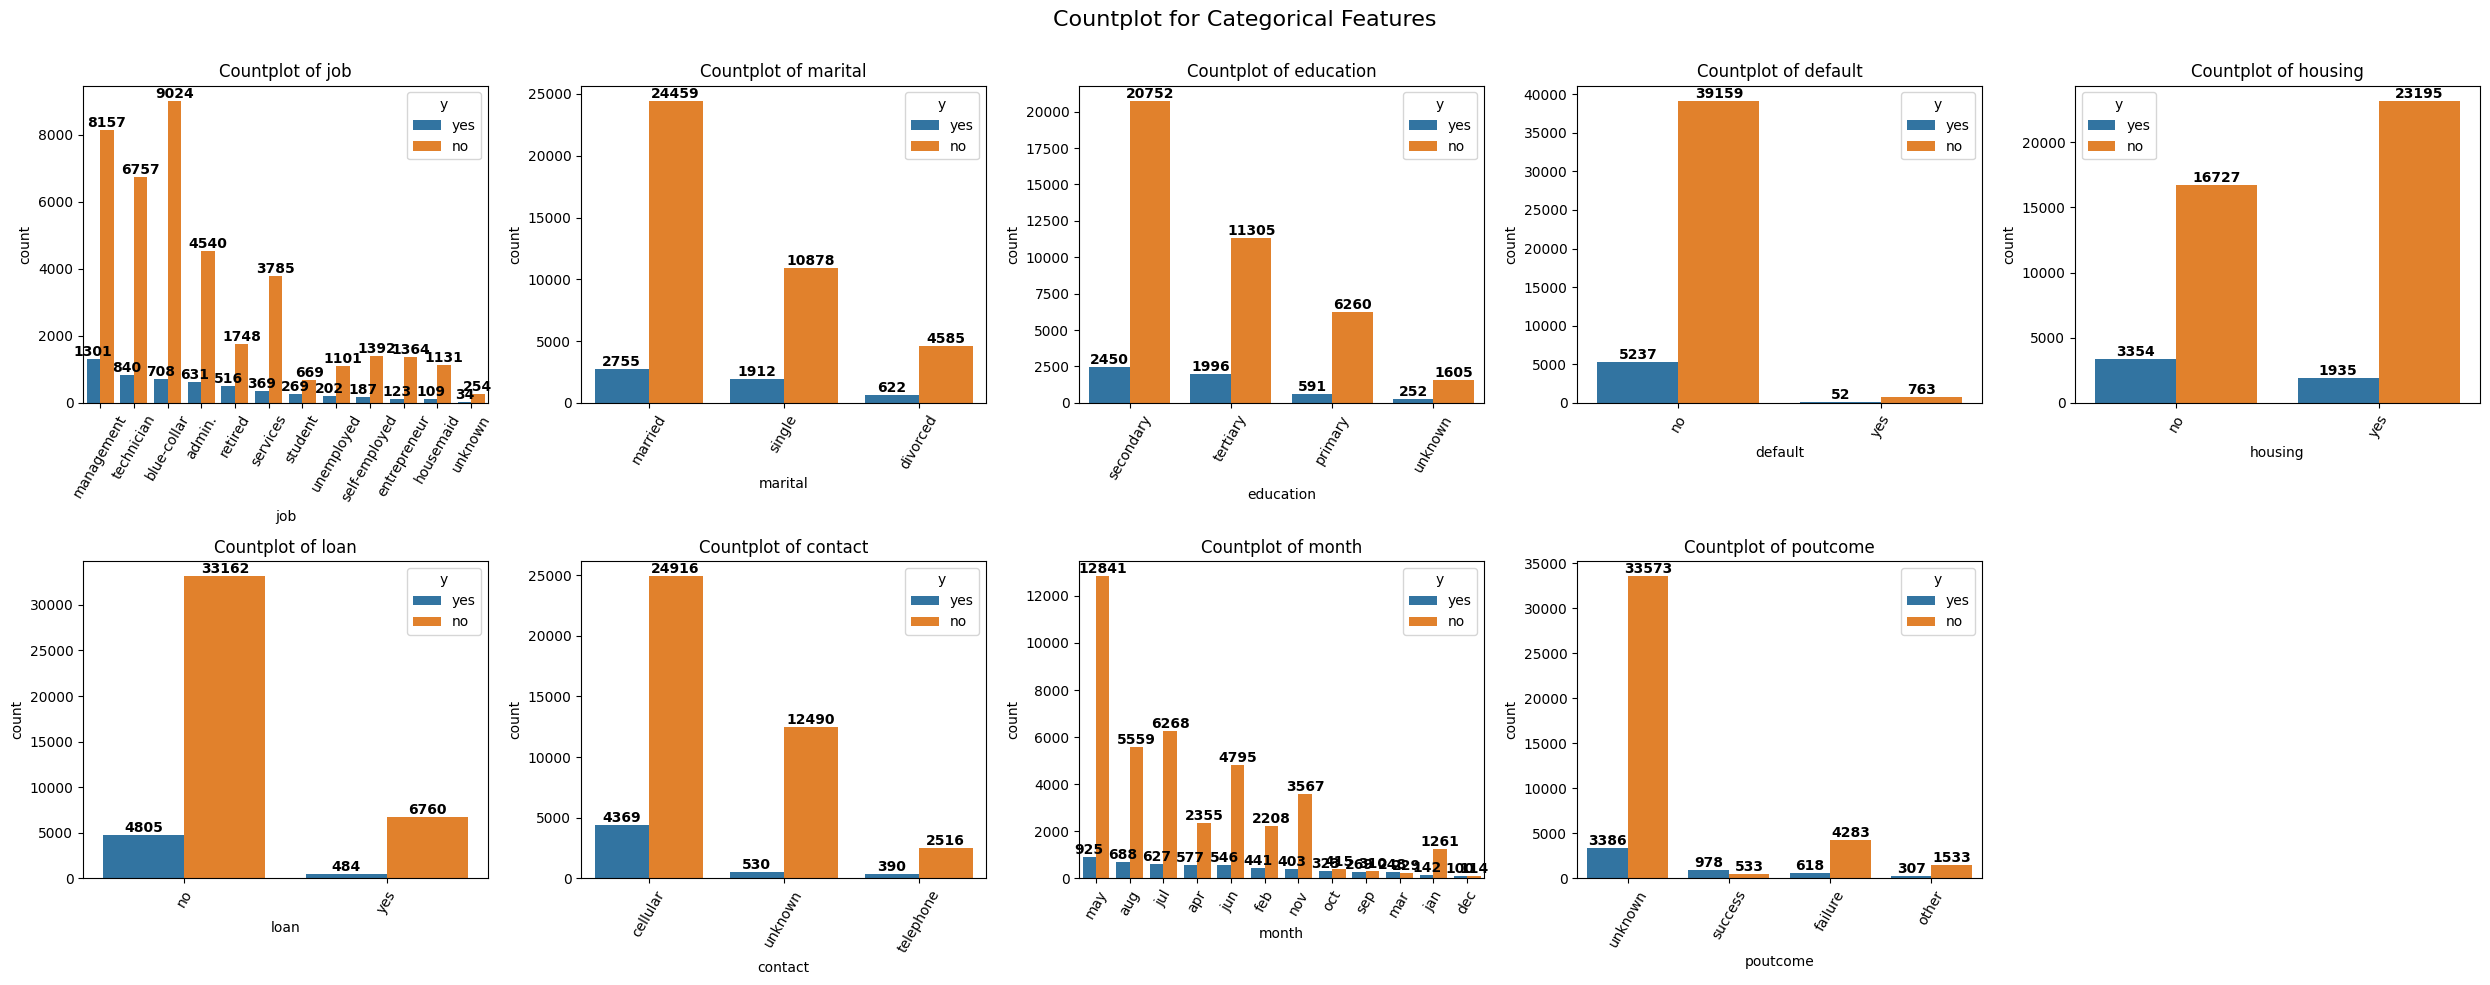

In [35]:
plt.figure(figsize=(25, 10))
for i in range(0, len(cats)-1):
    df_group = df.groupby('y')[cats[i]].value_counts().reset_index(name='count').sort_values(by=['y','count'], ascending=False).set_index([cats[i]])
    plt.subplot(2,5, i+1)
    ab=sns.countplot(x=df[cats[i]], order = df_group.index[:int(len(df_group)/2)], hue=df['y'], hue_order=['yes', 'no'])
    plt.title('Countplot of {}'.format(cats[i]))
    plt.suptitle('Countplot for Categorical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout()
    plt.xticks(rotation = 60)

    for label in ab.containers :
        ab.bar_label(label, fontweight ='bold')
plt.show()

In [36]:
df['marital'].value_counts()
dfa = df.groupby(['marital', 'y'])['age'].count()

dfa_pr = dfa.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index(name='percentage')
df_viz = dfa_pr.merge(dfa.reset_index(), how = 'inner', on = ['marital', 'y'])
df_viz

,marital,y,percentage,age
0,divorced,no,88.054542,4585
1,divorced,yes,11.945458,622
2,married,no,89.876534,24459
3,married,yes,10.123466,2755
4,single,no,85.050821,10878
5,single,yes,14.949179,1912


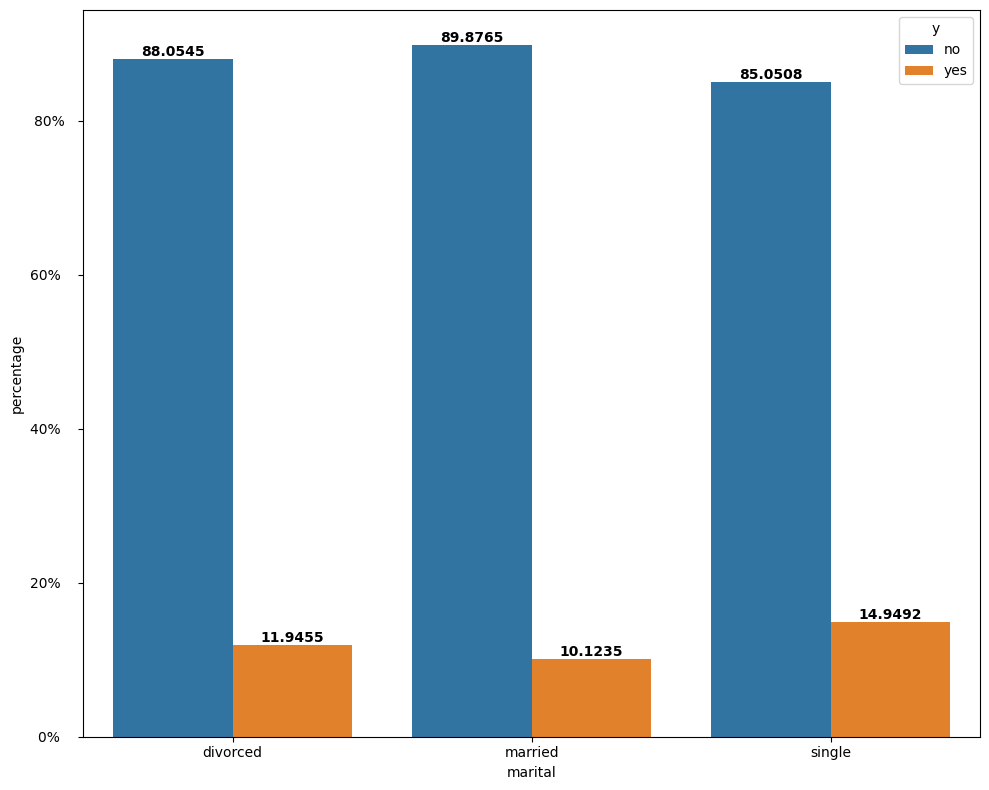

In [37]:
import matplotlib.ticker as mticker
plt.figure(figsize=(10,8))
axt = sns.barplot(x='marital', y='percentage', hue='y', data=df_viz)

for label in axt.containers :
    axt.bar_label(label, fontweight ='bold')

ticks_loc = axt.get_yticks()
axt.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
axt.set_yticklabels(labels =  ['0%   ', '20%   ', '40%   ', '60%   ', '80%  ', '100%'])


plt.tight_layout()

#Insights
- Dari ketiga status pernikahan, yang paling banyak membuka deposito adalah di kategori 'single', sebanyak 14,9%

Dari hasil visualisasi Countplot untuk seluruh variable kategorikal terhadap output variable yaitu `y`, dapat diketahui bahwa:

**Grafik Job**  
Nasabah yang paling sering dihubungi adalah mereka yang bekerja dalam sektor `blue-collar`. Jenis pekerjaan `blue-collar` memiliki jumlah nasabah tanpa langganan yang paling tinggi, sementara pekerjaan di bidang `manajemen` memiliki jumlah nasabah yang berlangganan paling tinggi. Pekerjaan sebagai `pelajar` memiliki rasio tertinggi antara nasabah yang berlangganan dan yang tidak, sedangkan rasio terendah terjadi pada nasabah dengan pekerjaan `blue-collar`. Secara keseluruhan, jumlah nasabah yang tidak berlangganan selalu lebih besar daripada jumlah nasabah yang berlangganan.

**Grafik Marital**  
Jumlah nasabah yang berlangganan dan tidak berlangganan paling besar terdapat pada status perkawinan `married`, diikuti oleh status `single` dan `divorced`.

**Grafik Education**  

Pendidikan tingkat `secondary` memiliki jumlah nasabah yang berlangganan dan tidak berlangganan paling tinggi, sementara tingkat pendidikan `primary` memiliki jumlah yang lebih rendah.

**Grafik Default**  
Jumlah nasabah yang berlangganan dan tidak berlangganan paling tinggi terdapat pada kelompok nasabah yang belum memiliki riwayat kredit sebelumnya, dibandingkan dengan nasabah yang telah memiliki riwayat kredit sebelumnya.

**Grafik Housing**  
Lebih banyak nasabah yang tidak memiliki cicilan rumah yang berlangganan dibandingkan dengan nasabah yang memiliki cicilan rumah.

**Grafik Loan**  
Jumlah nasabah yang berlangganan lebih banyak terdapat di antara mereka yang tidak memiliki pinjaman pribadi, daripada nasabah yang memiliki pinjaman pribadi.

**Grafik Contact**  
Jumlah nasabah yang berlangganan paling banyak terdapat pada kelompok nasabah yang dihubungi melalui jenis komunikasi 'cellular', melebihi jumlah nasabah pada jenis komunikasi lainnya.

**Grafik Month**  
Nasabah yang berlangganan dan yang tidak berlangganan memiliki jumlah tertinggi pada bulan Mei dibandingkan bulan lainnya.

**Grafik Poutcome**  
Mereka yang telah meraih kesuksesan dari kampanye sebelumnya memiliki rasio pembukaan deposito yang paling tinggi.


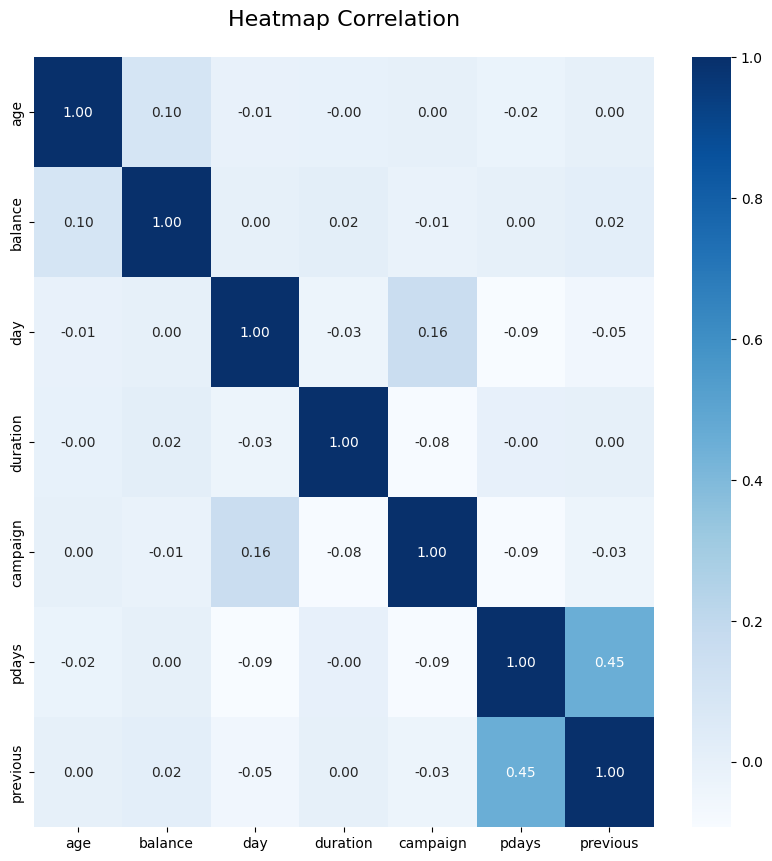

In [38]:
# Membuat heatmap untuk melihat korelasi antar kolom numerikal
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Heatmap Correlation\n', fontsize=16)
plt.show()

<Figure size 1500x1500 with 0 Axes>

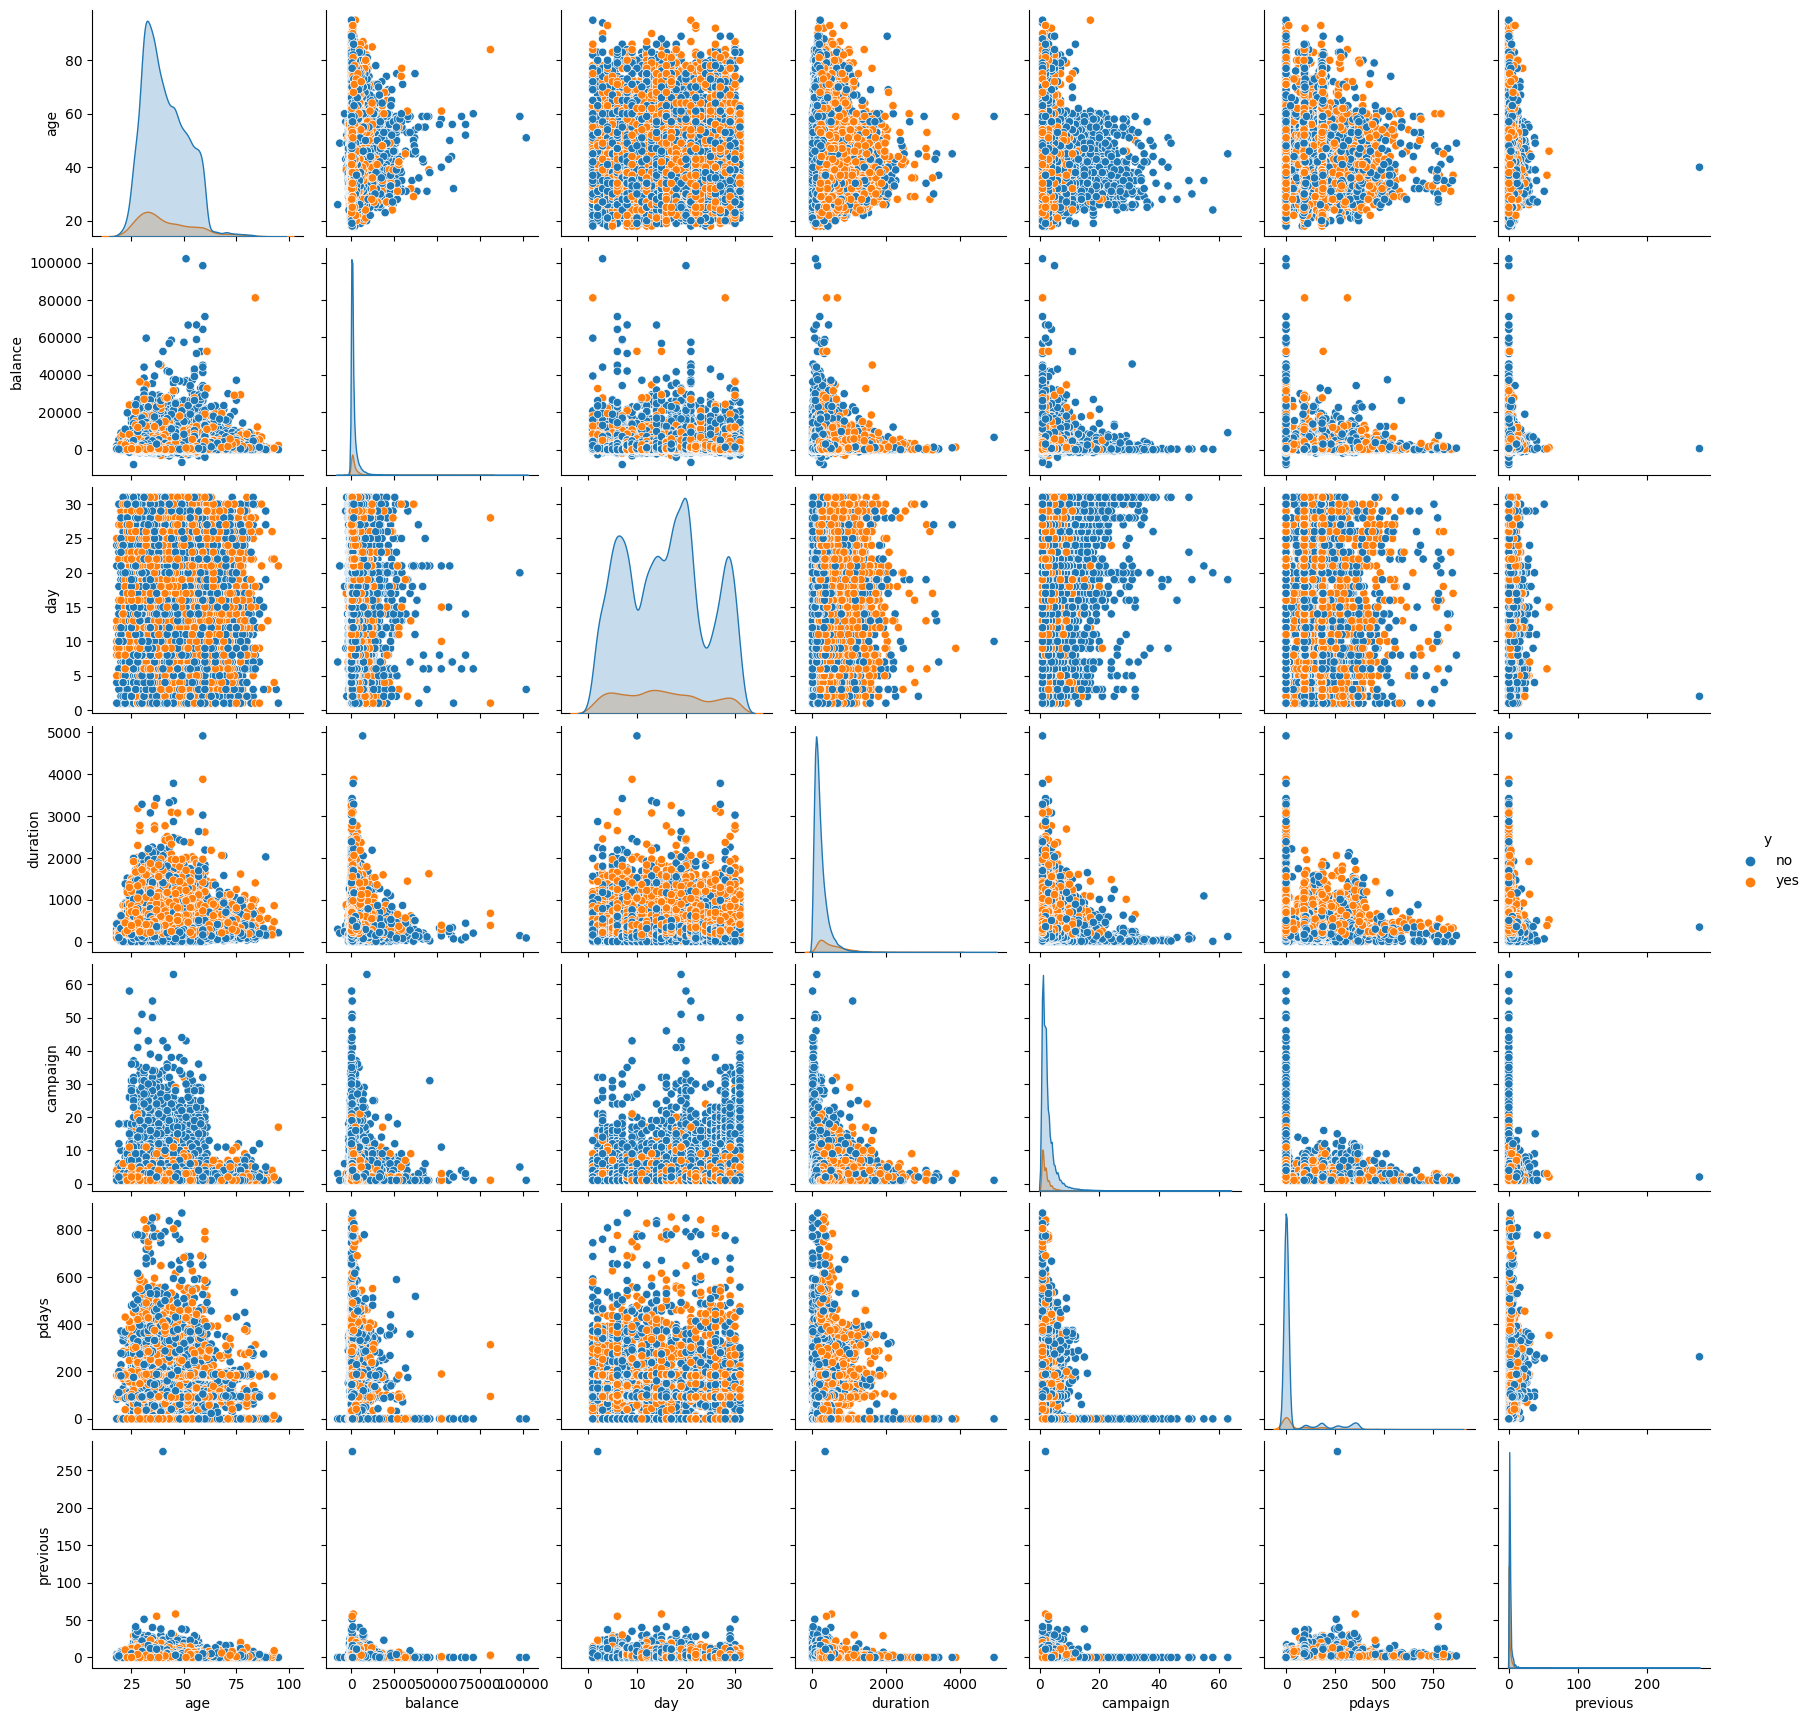

In [39]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', hue='y')
plt.show()

In [40]:
from sklearn.feature_selection import f_classif, chi2, SelectKBest
# split dataset into features (X) and target (y)
X = df[['age','balance','day','duration','campaign','pdays','previous']]
y = df['y']

# perform ANOVA feature selection
f_scores, p_values = f_classif(X, y)

# create a dataframe to store feature names, f-scores, and p-values
anova_results = pd.DataFrame({'Features': X.columns, 'F-Scores': f_scores, 'P-Values': p_values})

# sort the dataframe by descending f-scores
anova_results = anova_results.sort_values(by='F-Scores', ascending=False, ignore_index=True)

# print the feature scores
anova_results

,Features,F-Scores,P-Values
0,duration,8333.761148,0.000000e+00
1,pdays,490.696563,3.790553e-108
2,previous,396.443989,7.801830e-88
3,campaign,243.358404,1.012347e-54
4,balance,126.572276,2.521114e-29
5,day,36.359010,1.653880e-09
6,age,28.625233,8.825644e-08


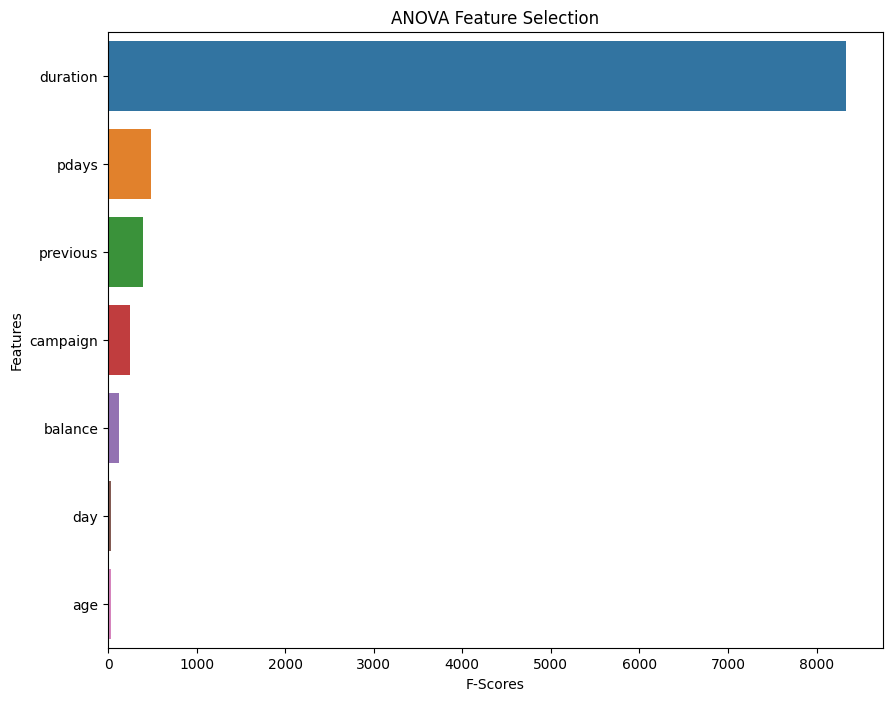

In [41]:
plt.figure(figsize=(10, 8))
sns.barplot(x='F-Scores', y='Features', data=anova_results, orient='h')
plt.title('ANOVA Feature Selection')
plt.xlabel('F-Scores')
plt.ylabel('Features')
plt.show()

In [42]:
# split dataset into features (X) and target (y)
X = df[['job','marital','education','default','housing','loan','contact','month','poutcome']]
y = df['y']

# convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X, columns=X.columns)

# perform Chi2 feature selection
chi2_scores, p_values = chi2(X, y)

# create a dataframe to store feature names, chi2_scores, and p-values
chi2_results = pd.DataFrame({'Features': X.columns, 'chi2_scores': chi2_scores, 'P-Values': p_values})

# sort the dataframe by descending chi2_scores
chi2_results = chi2_results.sort_values(by='chi2_scores', ascending=False)

# print the feature scores
chi2_results = chi2_results.reset_index(drop=True)

# Only RevLineCr_Y, LowDoc_Y, RevLineCr_Y, LowDoc_N
# chi2_results = chi2_results.drop(chi2_results.index[32:])
# chi2_results = chi2_results.drop([0, 4, 14, 19, 22, 23, 28, 30]).reset_index(drop=True)
chi2_results

,Features,chi2_scores,P-Values
0,poutcome_success,4113.000571,0.000000e+00
1,month_mar,749.691937,4.681507e-165
2,month_oct,734.708162,8.480926e-162
3,contact_unknown,733.354934,1.669907e-161
4,month_sep,677.273004,2.617913e-149
5,housing_no,486.744003,7.282570e-108
6,housing_yes,388.949715,1.401285e-86
7,month_may,330.368818,7.988374e-74
8,contact_cellular,294.017126,6.626455e-66
9,job_retired,269.699331,1.319590e-60


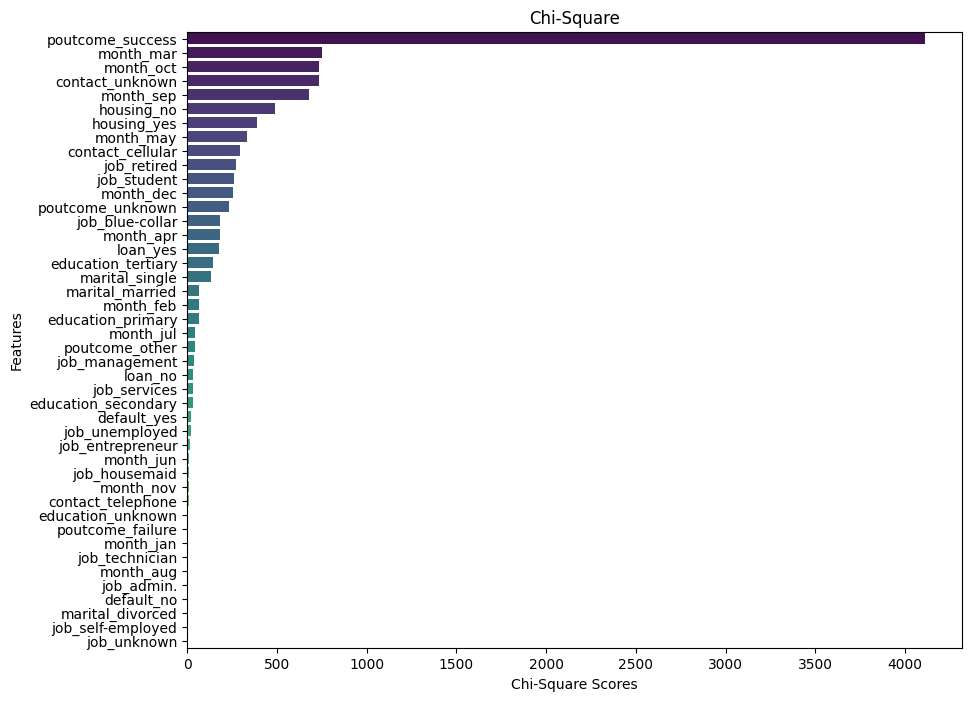

In [43]:
# create horizontal bar plot for chi-square scores
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='chi2_scores', y='Features', data=chi2_results, palette='viridis')

# set title and labels
ax.set_title('Chi-Square')
ax.set_xlabel('Chi-Square Scores')
ax.set_ylabel('Features')

# show the plot
plt.show()

In [44]:
# create a SelectKBest object
selector = SelectKBest(chi2, k=5)

# fit selector to data
selector.fit(X, y)

# get selected features
selected_features = X.columns[selector.get_support()]

# display selected features
print('Selected features:', list(selected_features))

Selected features: ['contact_unknown', 'month_mar', 'month_oct', 'month_sep', 'poutcome_success']


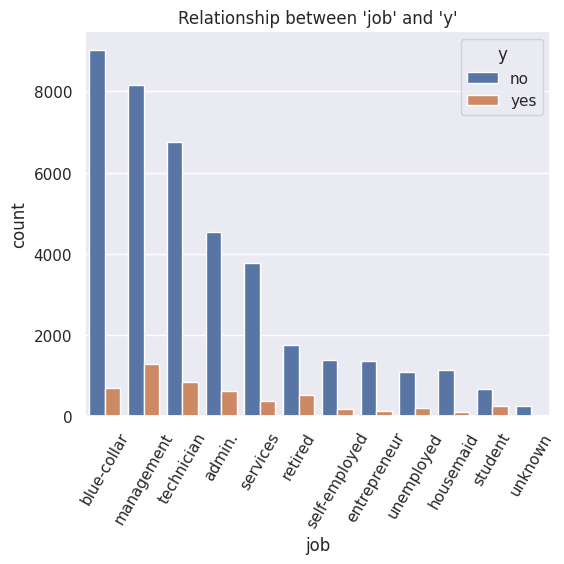

In [48]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
job = sns.countplot(x="job", data = df, hue = "y", order = df["job"].value_counts().index)
job.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'job' and 'y'")
plt.show()

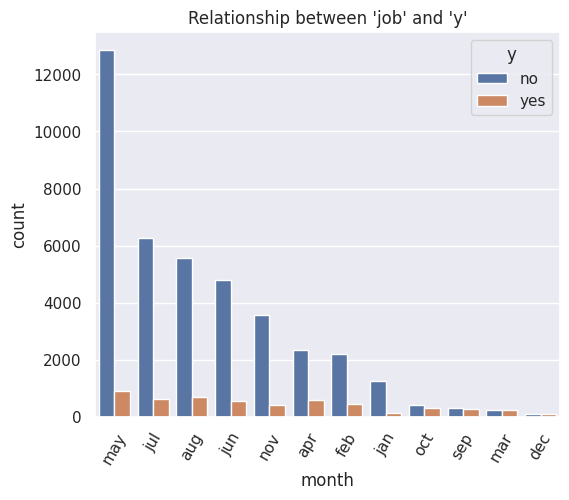

In [49]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
job = sns.countplot(x="month", data = df, hue = "y", order = df["month"].value_counts().index)
job.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'month' and 'y'")
plt.show()

In [51]:
df['duration'].min()

0

## Tambahan FE

## merubah nilai munus(-) pada column balance menjadi 0 

In [78]:
#Tidak bisa dipakai : duration (last contact duration in second, ga dikontak berarti 0)
#Duration ada datanya jika kita sudah selesai hubungin, meanwhile campaign sekarang blm pernah ada yg dihubungin

df.loc[df['balance'] < 0, 'balance'] = 0
df['balance'].min()


0

sudah tidak ada balance yang negatif

In [23]:
# mengecek nilai kolum yang hanya ada 1 nilai unique
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      6252
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

tidak kolum yang memiliki nilai unique hanya 1 

## melakukan uji VIF untuk melihat multikol

In [38]:
# melakukan uji VIF untuk melihat adakah indikasi multikol pada kolum pdays dan previous
from statsmodels.stats.outliers_influence import variance_inflation_factor
def call_vif(df) : 
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['variable'] = df.columns
    return(vif)


In [41]:
call_vif(df[[i for i in df.describe().columns if i not in ['y']]])

,VIF,variable
0,5.009484,age
1,1.222884,balance
2,3.984524,day
3,1.901337,duration
4,1.824672,campaign
5,1.454203,pdays
6,1.341626,previous


pada pengujian VIF dapat dilihat nilai pada setiap kolum tidak ada yang >10 maka dapat dikatan tidak ada kolum yang multikol

## encoding

melakukan perubahan pada kolum job, mengambil top 5 job dan sisanya yang dibawah itu akan menjadi others.

In [45]:
# mengecek jumlah unique value dari tiap job
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

berdasarkan eda diatas, kami akan mengambil top 5 job karena 5 job tersebut memiliki kemungkinan pengaruh yang cukup besar mendominasi data. sehingga top 5 job nya adalah blue-collar, management, technician, admin., dan  services

In [56]:
frekuensi_minim = 4000
count_kategori = df['job'].value_counts()
values_keep = count_kategori[count_kategori >= frekuensi_minim].index.tolist()
df['job_filter'] = df['job'].apply(lambda x: x if x in values_keep else 'others')
df['job_filter'].value_counts()

blue-collar    9732
management     9458
others         9099
technician     7597
admin.         5171
services       4154
Name: job_filter, dtype: int64

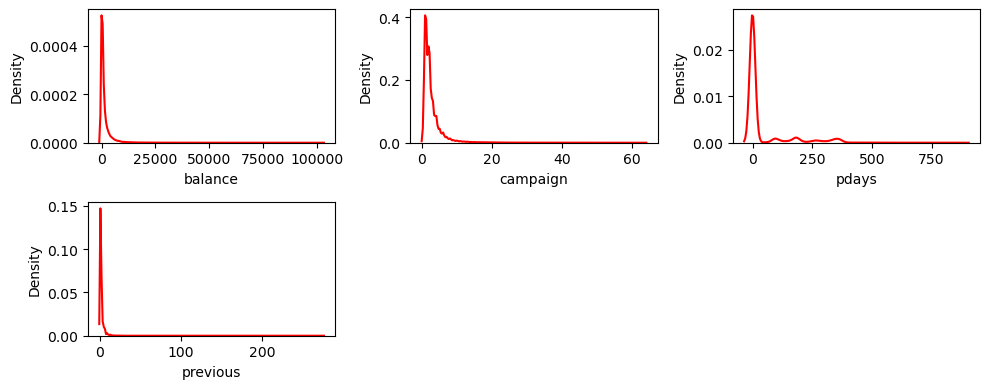

In [64]:
num = ['balance','campaign','pdays','previous']
plt.figure(figsize=(10,4))
for i in range(0, len(num)):
    plt.subplot(2,3, i+1)
    sns.kdeplot(x = df[num[i]], color = "red")
    plt.xlabel(num[i])
    plt.tight_layout()

dari visualisasi diatas menunjukkan data numerik yang ada pada data frame kebanyakan skew sehingga kami lakukan handle outliers menggunakan interquartile.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  y           45211 non-null  object
 17  job_filter  45211 non-null  object
dtypes: int64(7), object(11)
memory usage: 6.2+ MB


In [114]:
# handle outliers

# melakukan df copy agar mempunyai 2 df yang asli dan yang telah di handle outliers
df_no_outliers = df.copy()
df_no_outliers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  y           45211 non-null  object
 17  job_filter  45211 non-null  object
dtypes: int64(7), object(11)
memory usage: 6.2+ MB


In [127]:
# menghandle outliers dengan IQR
filtered_entries = np.array([True] * len(df))
for f in['campaign','pdays','previous']:
    Q1 = df_no_outliers[f].quantile(0.25)
    Q3 = df_no_outliers[f].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = ((df_no_outliers[f] >= lower_bound) & (df_no_outliers[f] <= upper_bound))

KeyError: 'campaign'

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  y           45211 non-null  object
 17  job_filter  45211 non-null  object
dtypes: int64(7), object(11)
memory usage: 6.2+ MB


0        2143
1          29
2           2
3        1506
4           1
         ... 
45206     825
45207    1729
45208    5715
45209     668
45210    2971
Name: balance, Length: 45211, dtype: int64